In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/oral_cancer_dataset.csv")
df.head(5)

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,Low,No,No,No,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,High,No,No,No,Yes,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,Moderate,No,No,No,No,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,Moderate,No,No,Yes,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,High,No,No,No,No,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


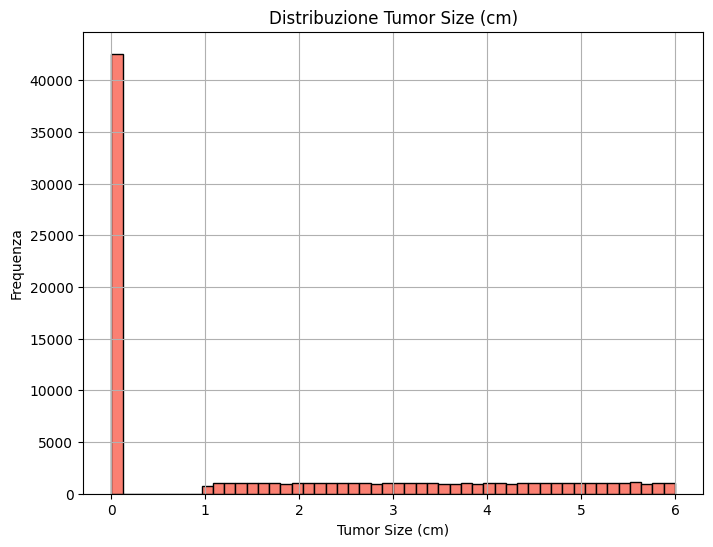

In [3]:
plt.figure(figsize=(8,6))
plt.hist(df["Tumor Size (cm)"], bins=50, color="salmon", edgecolor="black")
plt.title("Distribuzione Tumor Size (cm)")
plt.xlabel("Tumor Size (cm)")
plt.ylabel("Frequenza")
plt.grid(True)
plt.show()

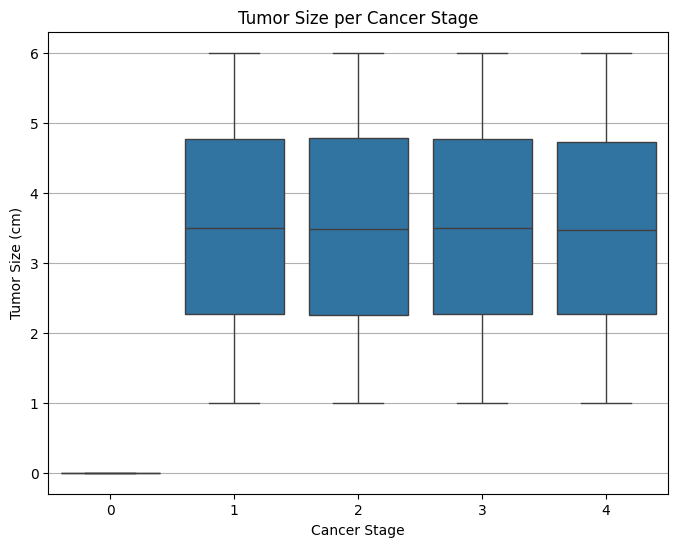

In [4]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Cancer Stage", y="Tumor Size (cm)")
plt.title("Tumor Size per Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Tumor Size (cm)")
plt.grid(True, axis="y")
plt.show()


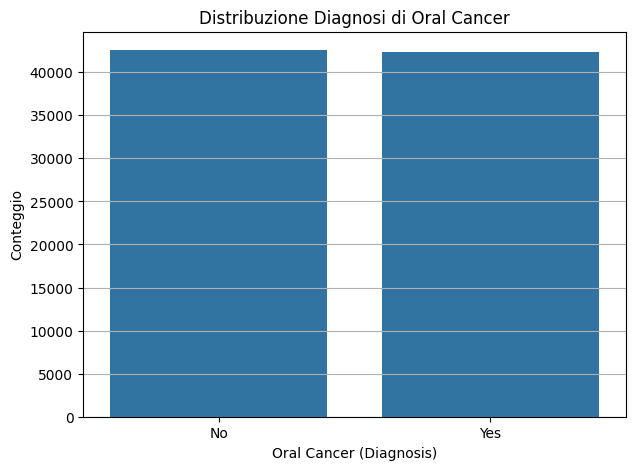

In [5]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Oral Cancer (Diagnosis)")
plt.title("Distribuzione Diagnosi di Oral Cancer")
plt.xlabel("Oral Cancer (Diagnosis)")
plt.ylabel("Conteggio")
plt.grid(True, axis="y")
plt.show()


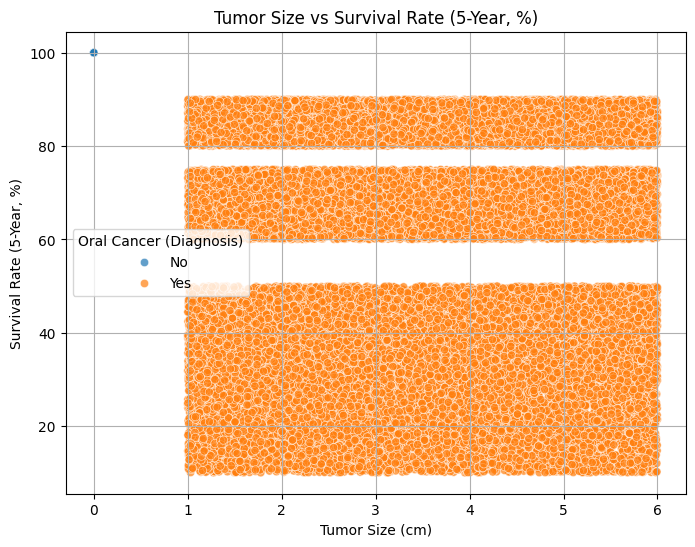

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Tumor Size (cm)",
    y="Survival Rate (5-Year, %)",
    hue="Oral Cancer (Diagnosis)",
    alpha=0.7
)
plt.title("Tumor Size vs Survival Rate (5-Year, %)")
plt.xlabel("Tumor Size (cm)")
plt.ylabel("Survival Rate (5-Year, %)")
plt.grid(True)
plt.show()


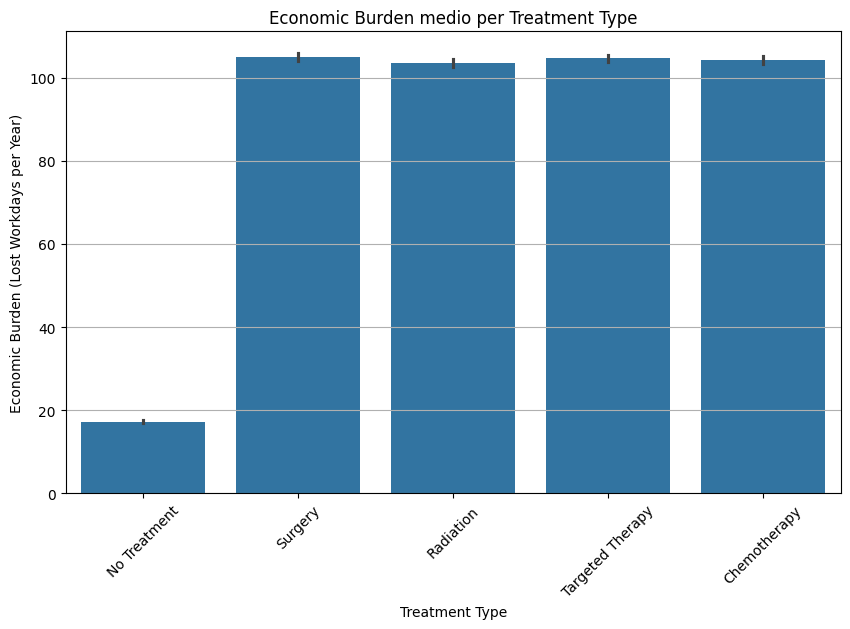

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x="Treatment Type",
    y="Economic Burden (Lost Workdays per Year)",
    estimator="mean"
)
plt.title("Economic Burden medio per Treatment Type")
plt.xlabel("Treatment Type")
plt.ylabel("Economic Burden (Lost Workdays per Year)")
plt.xticks(rotation=45)
plt.grid(True, axis="y")
plt.show()


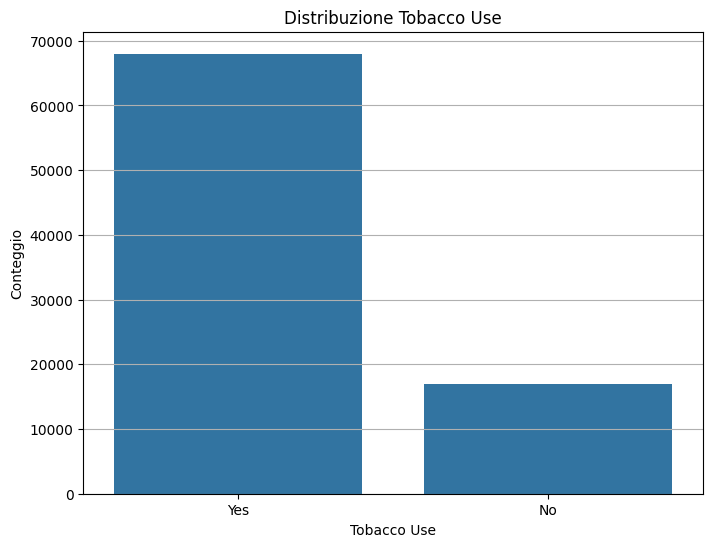

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Tobacco Use")
plt.title("Distribuzione Tobacco Use")
plt.xlabel("Tobacco Use")
plt.ylabel("Conteggio")
plt.grid(True, axis="y")
plt.show()


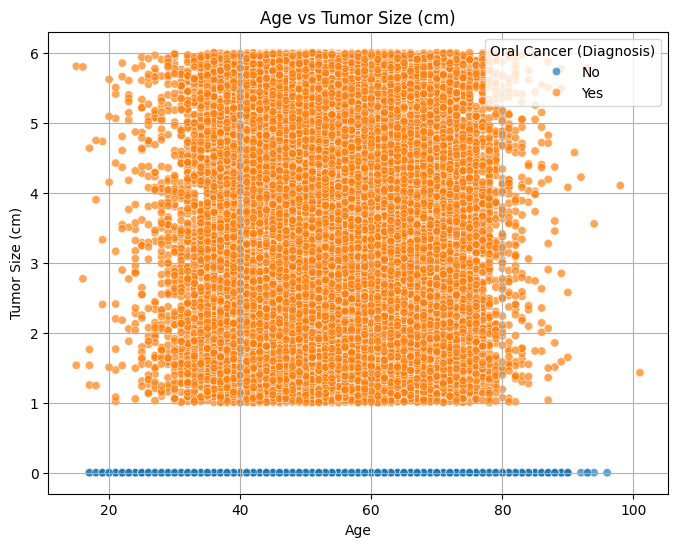

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Age",
    y="Tumor Size (cm)",
    hue="Oral Cancer (Diagnosis)",
    alpha=0.7
)
plt.title("Age vs Tumor Size (cm)")
plt.xlabel("Age")
plt.ylabel("Tumor Size (cm)")
plt.grid(True)
plt.show()


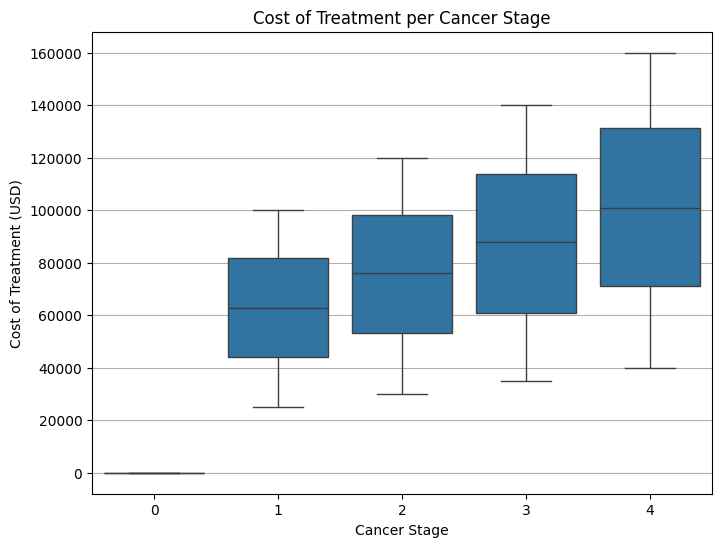

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="Cancer Stage",
    y="Cost of Treatment (USD)"
)
plt.title("Cost of Treatment per Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Cost of Treatment (USD)")
plt.grid(True, axis="y")
plt.show()


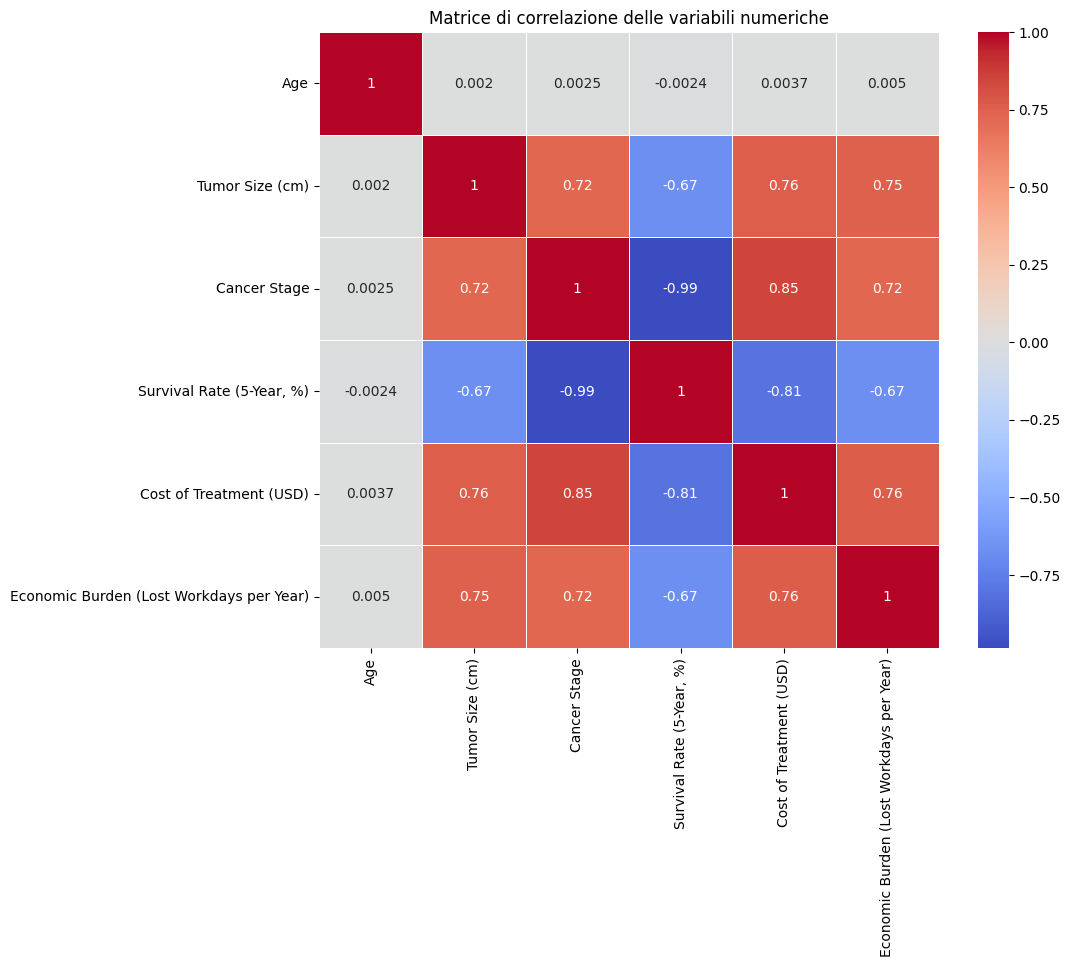

In [11]:
num_cols = ["Age","Tumor Size (cm)","Cancer Stage","Survival Rate (5-Year, %)","Cost of Treatment (USD)","Economic Burden (Lost Workdays per Year)"]
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice di correlazione delle variabili numeriche")
plt.show()


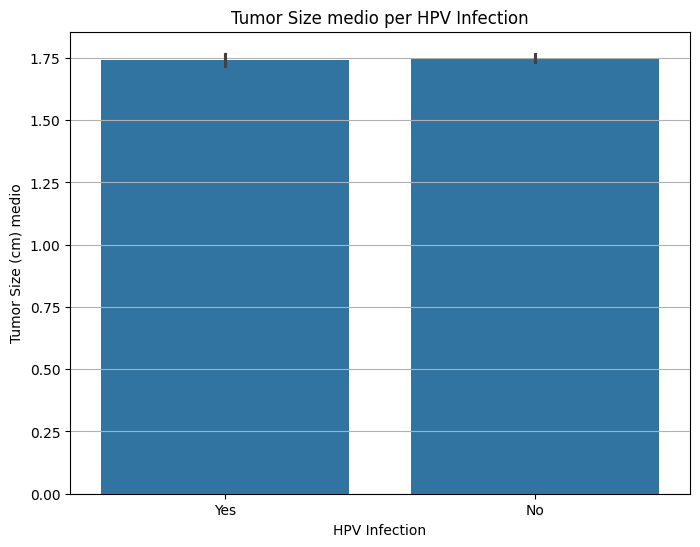

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=df,
    x="HPV Infection",
    y="Tumor Size (cm)",
    estimator="mean"
)
plt.title("Tumor Size medio per HPV Infection")
plt.xlabel("HPV Infection")
plt.ylabel("Tumor Size (cm) medio")
plt.grid(True, axis="y")
plt.show()
